In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    

In [36]:
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\Decision Trees\car_price_prediction_.csv")
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [38]:
df.shape

(2500, 10)

In [39]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.columns=df.columns.str.strip()

In [42]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [43]:
df.drop(["Car ID","Brand"],axis=1,inplace=True)

In [44]:
df.head()

,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [45]:
df['car_Age'] =2025-df['Year']
df.head()

,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,car_Age
0,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X,9
1,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series,7
2,2013,4.5,Electric,Manual,181601,New,44402.61,A4,12
3,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y,14
4,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang,16


In [46]:
df.drop("Year",axis=1,inplace=True)

In [47]:
df.head()

,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,car_Age
0,2.3,Petrol,Manual,114832,New,26613.92,Model X,9
1,4.4,Electric,Manual,143190,Used,14679.61,5 Series,7
2,4.5,Electric,Manual,181601,New,44402.61,A4,12
3,4.1,Diesel,Automatic,68682,New,86374.33,Model Y,14
4,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang,16


In [48]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Fuel Type"]=encoder.fit_transform(df["Fuel Type"])
df["Transmission"]=encoder.fit_transform(df["Transmission"])
df["Condition"]=encoder.fit_transform(df["Condition"])
df["Model"]=encoder.fit_transform(df["Model"])

In [49]:
df.head()

,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,car_Age
0,2.3,3,1,114832,1,26613.92,19,9
1,4.4,1,1,143190,2,14679.61,1,7
2,4.5,1,1,181601,1,44402.61,3,12
3,4.1,0,0,68682,1,86374.33,20,14
4,2.6,0,1,223009,0,73577.10,21,16


In [50]:
df.dtypes

Engine Size     float64
Fuel Type         int64
Transmission      int64
Mileage           int64
Condition         int64
Price           float64
Model             int64
car_Age           int64
dtype: object

In [51]:
df.head()

,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,car_Age
0,2.3,3,1,114832,1,26613.92,19,9
1,4.4,1,1,143190,2,14679.61,1,7
2,4.5,1,1,181601,1,44402.61,3,12
3,4.1,0,0,68682,1,86374.33,20,14
4,2.6,0,1,223009,0,73577.10,21,16


In [55]:
x=df.drop("Price",axis=1)
y=df["Price"]
y

0       26613.92
1       14679.61
2       44402.61
3       86374.33
4       73577.10
          ...   
2495    61384.10
2496    24710.35
2497    29902.45
2498    46085.67
2499    16594.14
Name: Price, Length: 2500, dtype: float64

In [56]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,train_size=0.86)
x_train.shape,y_train.shape

((2150, 7), (2150,))

-1.2141601191627238
32368.1764
1593808087.74328


[Text(0.7055705281650805, 0.9827586206896551, 'x[3] <= 219457.5\nsquared_error = 748822039.47\nsamples = 2150\nvalue = 52656.189'),
 Text(0.4809400141316503, 0.9482758620689655, 'x[3] <= 137857.0\nsquared_error = 752023987.556\nsamples = 1556\nvalue = 53802.118'),
 Text(0.5932552711483654, 0.9655172413793103, 'True  '),
 Text(0.3217743694053688, 0.9137931034482759, 'x[3] <= 135006.5\nsquared_error = 740959663.696\nsamples = 996\nvalue = 51893.076'),
 Text(0.1879009548207401, 0.8793103448275862, 'x[5] <= 1.5\nsquared_error = 738980358.418\nsamples = 980\nvalue = 52197.027'),
 Text(0.020894627047757703, 0.8448275862068966, 'x[6] <= 16.5\nsquared_error = 588571142.39\nsamples = 75\nvalue = 59692.636'),
 Text(0.013156874837813883, 0.8103448275862069, 'x[6] <= 10.5\nsquared_error = 543404344.494\nsamples = 48\nvalue = 64294.536'),
 Text(0.009058831855543984, 0.7758620689655172, 'x[1] <= 2.5\nsquared_error = 641960832.279\nsamples = 27\nvalue = 56863.361'),
 Text(0.00625490770978037, 0.74137

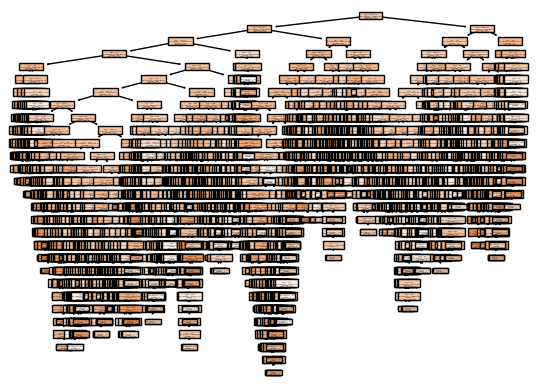

In [77]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,roc_auc_score
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))
plt.scatter(y_test,y_predict)
from sklearn import tree
tree.plot_tree(model,filled=True)


In [66]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
model_lin=LinearRegression()
model_lin.fit(x_train,y_train)
y_predict_lin=model_lin.predict(x_test)
print(r2_score(y_test,y_predict_lin))
print(mean_absolute_error(y_test,y_predict_lin))
print(mean_squared_error(y_test,y_predict_lin))


0.003484080422463287
23387.312746963475
717317197.8132287


In [67]:
model_lasso=Lasso()
model_lasso.fit(x_train,y_train)
y_predict_lasso=model_lasso.predict(x_test)
print(r2_score(y_test,y_predict_lasso))
print(mean_absolute_error(y_test,y_predict_lasso))
print(mean_squared_error(y_test,y_predict_lasso))

0.0034837172999298005
23387.31801079294
717317459.1979524


In [68]:
model_ridge=Ridge()
model_ridge.fit(x_train,y_train)
y_predict_ridge=model_ridge.predict(x_test)
print(r2_score(y_test,y_predict_ridge))
print(mean_absolute_error(y_test,y_predict_ridge))
print(mean_squared_error(y_test,y_predict_ridge))

0.0034838894135250653
23387.319918028465
717317335.3062619


In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [70]:
model_poly=LinearRegression()
model_poly.fit(x_train_poly,y_train)
y_predict_poly=model_poly.predict(x_test_poly)
print(r2_score(y_test,y_predict_poly))
print(mean_absolute_error(y_test,y_predict_poly))
print(mean_squared_error(y_test,y_predict_poly))

-0.028413900019649274
23630.29852923788
740278165.6182765


In [62]:
df.head()

,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,car_Age
0,2.3,3,1,114832,1,26613.92,19,9
1,4.4,1,1,143190,2,14679.61,1,7
2,4.5,1,1,181601,1,44402.61,3,12
3,4.1,0,0,68682,1,86374.33,20,14
4,2.6,0,1,223009,0,73577.10,21,16


In [ ]:
model=DecisionTreeRegressor()

In [71]:
parms={
    "criterion":['squared_error','friedman_mse','absolute_error','poisson'],
    "splitter":['best', 'random'],
    "max_features":['auto', 'sqrt', 'log2'] ,
    "max_depth":[1,2,3,4,5,6,7,8,9]
}

In [73]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(
    model,param_grid=parms
)
grid_model.fit(x_train,y_train)
y_predict_grid=grid_model.predict(x_test)
print(r2_score(y_test,y_predict_grid))
print(mean_absolute_error(y_test,y_predict_grid))
print(mean_squared_error(y_test,y_predict_grid))


-0.008184842363421652
23459.580330489604
725716781.6330421


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c

In [74]:
grid_model.best_score_

np.float64(0.0005544072280031509)

In [78]:
df.head()

,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,car_Age
0,2.3,3,1,114832,1,26613.92,19,9
1,4.4,1,1,143190,2,14679.61,1,7
2,4.5,1,1,181601,1,44402.61,3,12
3,4.1,0,0,68682,1,86374.33,20,14
4,2.6,0,1,223009,0,73577.10,21,16


In [79]:
x1=df.drop("Condition",axis=1)
y1=df["Condition"]
y1

0       1
1       2
2       1
3       1
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    2
Name: Condition, Length: 2500, dtype: int64

In [81]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,random_state=10,train_size=0.86)
x_train1.shape,y_train1.shape

((2150, 7), (2150,))

0.34
              precision    recall  f1-score   support

           0       0.36      0.35      0.36       124
           1       0.31      0.37      0.34       105
           2       0.34      0.30      0.32       121

    accuracy                           0.34       350
   macro avg       0.34      0.34      0.34       350
weighted avg       0.34      0.34      0.34       350

[[44 45 35]
 [32 39 34]
 [45 40 36]]


[Text(0.4609547281632528, 0.9827586206896551, 'x[6] <= 4.5\ngini = 0.667\nsamples = 2150\nvalue = [712.0, 704.0, 734.0]'),
 Text(0.0741576672773094, 0.9482758620689655, 'x[3] <= 10720.5\ngini = 0.654\nsamples = 275\nvalue = [78, 117, 80]'),
 Text(0.2675561977202811, 0.9655172413793103, 'True  '),
 Text(0.05056526623685516, 0.9137931034482759, 'x[1] <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9, 0]'),
 Text(0.04926975901541451, 0.8793103448275862, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.0518607734582958, 0.8793103448275862, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.09775006831776363, 0.9137931034482759, 'x[3] <= 223857.0\ngini = 0.658\nsamples = 265\nvalue = [77, 108, 80]'),
 Text(0.05445178790117709, 0.8793103448275862, 'x[3] <= 142444.0\ngini = 0.665\nsamples = 188\nvalue = [56, 68, 64]'),
 Text(0.02615305203283301, 0.8448275862068966, 'x[6] <= 2.5\ngini = 0.647\nsamples = 119\nvalue = [36, 53, 30]'),
 Text(0.01425057943584709, 0.8103448275862069, 'x[0] 

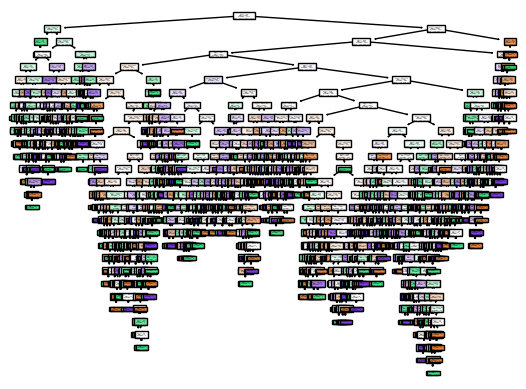

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
model_clas=DecisionTreeClassifier()
model_clas.fit(x_train1,y_train1)
y_predict_clas=model_clas.predict(x_test1)
print(accuracy_score(y_test,y_predict_clas))
print(classification_report(y_test,y_predict_clas))
print(confusion_matrix(y_test,y_predict_clas))
tree.plot_tree(model_clas,filled=True)